In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from qgrid import show_grid as exl
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df = df[df.Response==0]

In [4]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0


In [8]:
for i in df.columns:
    print(i)

ID
City_Code
Region_Code
Accomodation_Type
Reco_Insurance_Type
Upper_Age
Lower_Age
Is_Spouse
Health Indicator
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium
Response


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [12]:
# Percentage of missing data
(df.isna().sum()/len(df))*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

# <center>Analysing Data</center>

# 1. City Code

In [14]:
df.City_Code.head()

0     C3
1     C5
2     C5
3    C24
4     C8
Name: City_Code, dtype: object

In [15]:
df.City_Code.unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [16]:
len(df.City_Code.unique())

36

In [39]:
Counter(df.City_Code)

Counter({'C3': 4889,
         'C5': 1364,
         'C24': 553,
         'C8': 1806,
         'C9': 2185,
         'C1': 8973,
         'C15': 1186,
         'C28': 285,
         'C27': 295,
         'C7': 1910,
         'C20': 926,
         'C25': 366,
         'C4': 3671,
         'C2': 7747,
         'C34': 130,
         'C10': 1611,
         'C17': 1159,
         'C18': 797,
         'C16': 1135,
         'C29': 387,
         'C33': 286,
         'C26': 499,
         'C19': 899,
         'C6': 1950,
         'C12': 868,
         'C13': 1005,
         'C11': 1147,
         'C14': 746,
         'C22': 516,
         'C23': 587,
         'C21': 679,
         'C36': 36,
         'C32': 160,
         'C30': 58,
         'C35': 56,
         'C31': 15})

In [41]:
Counter(df.City_Code).most_common(10)

[('C1', 8973),
 ('C2', 7747),
 ('C3', 4889),
 ('C4', 3671),
 ('C9', 2185),
 ('C6', 1950),
 ('C7', 1910),
 ('C8', 1806),
 ('C10', 1611),
 ('C5', 1364)]

In [90]:
Counter(df.Accomodation_Type)

Counter({'Rented': 22931, 'Owned': 27951})

In [103]:
temp = df[['City_Code', 'Accomodation_Type']]
temp['at'] = np.ones(len(df))

In [104]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Owned'), ascending=False)

at       
Accomodation_Type Owned Rented
City_Code                     
C1                 6037   2936
C2                 4454   3293
C3                 2729   2160
C4                 1933   1738
C7                 1343    567
C9                 1084   1101
C6                  908   1042
C8                  841    965
C10                 626    985
C15                 621    565
C19                 611    288
C17                 606    553
C11                 561    586
C5                  536    828
C13                 475    530
C16                 474    661
C20                 444    482
C21                 429    250
C18                 405    392
C12                 385    483
C24                 361    192
C14                 316    430
C23                 263    324
C22                 252    264
C26                 239    260
C27                 182    113
C28                 178    107
C25                 157    209
C29                 151    236
C33                 112    174
C32                 100     60
C34                  48     82
C30                  33     25
C35                  30     26
C36                  22     14
C31                   5     10

In [105]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Rented'), ascending=False)

at       
Accomodation_Type Owned Rented
City_Code                     
C2                 4454   3293
C1                 6037   2936
C3                 2729   2160
C4                 1933   1738
C9                 1084   1101
C6                  908   1042
C10                 626    985
C8                  841    965
C5                  536    828
C16                 474    661
C11                 561    586
C7                 1343    567
C15                 621    565
C17                 606    553
C13                 475    530
C12                 385    483
C20                 444    482
C14                 316    430
C18                 405    392
C23                 263    324
C19                 611    288
C22                 252    264
C26                 239    260
C21                 429    250
C29                 151    236
C25                 157    209
C24                 361    192
C33                 112    174
C27                 182    113
C28                 178    107
C34                  48     82
C32                 100     60
C35                  30     26
C30                  33     25
C36                  22     14
C31                   5     10

In [92]:
Counter(df.Reco_Insurance_Type)

Counter({'Individual': 40536, 'Joint': 10346})

In [94]:
df[df.Reco_Insurance_Type=='Joint'].head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [95]:
df[df.Reco_Insurance_Type=='Individual'].head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0


In [107]:
temp = df[['City_Code', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [108]:
temp.pivot_table(index=['City_Code'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Individual'), ascending=False)

at        
Reco_Insurance_Type Individual   Joint
City_Code                             
C1                      6658.0  2315.0
C2                      6157.0  1590.0
C3                      3993.0   896.0
C4                      3168.0   503.0
C9                      1838.0   347.0
C6                      1657.0   293.0
C8                      1443.0   363.0
C7                      1362.0   548.0
C10                     1350.0   261.0
C5                      1146.0   218.0
C17                      924.0   235.0
C11                      893.0   254.0
C16                      874.0   261.0
C15                      870.0   316.0
C13                      845.0   160.0
C20                      763.0   163.0
C12                      706.0   162.0
C19                      695.0   204.0
C14                      628.0   118.0
C18                      603.0   194.0
C21                      538.0   141.0
C23                      485.0   102.0
C26                      419.0    80.0
C24                      416.0   137.0
C22                      415.0   101.0
C29                      326.0    61.0
C25                      301.0    65.0
C27                      245.0    50.0
C33                      228.0    58.0
C28                      216.0    69.0
C32                      132.0    28.0
C34                      105.0    25.0
C35                       49.0     7.0
C30                       45.0    13.0
C36                       28.0     8.0
C31                       15.0     NaN

In [109]:
temp.pivot_table(index=['City_Code'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Joint'), ascending=False)

at        
Reco_Insurance_Type Individual   Joint
City_Code                             
C1                      6658.0  2315.0
C2                      6157.0  1590.0
C3                      3993.0   896.0
C7                      1362.0   548.0
C4                      3168.0   503.0
C8                      1443.0   363.0
C9                      1838.0   347.0
C15                      870.0   316.0
C6                      1657.0   293.0
C16                      874.0   261.0
C10                     1350.0   261.0
C11                      893.0   254.0
C17                      924.0   235.0
C5                      1146.0   218.0
C19                      695.0   204.0
C18                      603.0   194.0
C20                      763.0   163.0
C12                      706.0   162.0
C13                      845.0   160.0
C21                      538.0   141.0
C24                      416.0   137.0
C14                      628.0   118.0
C23                      485.0   102.0
C22                      415.0   101.0
C26                      419.0    80.0
C28                      216.0    69.0
C25                      301.0    65.0
C29                      326.0    61.0
C33                      228.0    58.0
C27                      245.0    50.0
C32                      132.0    28.0
C34                      105.0    25.0
C30                       45.0    13.0
C36                       28.0     8.0
C35                       49.0     7.0
C31                       15.0     NaN

In [110]:
temp = df[['Accomodation_Type', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [114]:
temp.pivot_table(index=['Accomodation_Type'], columns=['Reco_Insurance_Type'],values=['at'], aggfunc='count')\
    .sort_values(by=('at',  'Individual'), ascending=False)

at      
Reco_Insurance_Type Individual Joint
Accomodation_Type                   
Rented                   20274  2657
Owned                    20262  7689

In [116]:
temp = df[['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type']]
temp['at'] = np.ones(len(df), int)

In [119]:
temp.pivot_table(index=['City_Code'], columns=['Accomodation_Type','Reco_Insurance_Type'],values=['at'], aggfunc='count')

at                          
Accomodation_Type        Owned             Rented       
Reco_Insurance_Type Individual   Joint Individual  Joint
City_Code                                               
C1                      4104.0  1933.0     2554.0  382.0
C10                      466.0   160.0      884.0  101.0
C11                      391.0   170.0      502.0   84.0
C12                      293.0    92.0      413.0   70.0
C13                      371.0   104.0      474.0   56.0
C14                      240.0    76.0      388.0   42.0
C15                      428.0   193.0      442.0  123.0
C16                      322.0   152.0      552.0  109.0
C17                      448.0   158.0      476.0   77.0
C18                      279.0   126.0      324.0   68.0
C19                      440.0   171.0      255.0   33.0
C2                      3212.0  1242.0     2945.0  348.0
C20                      319.0   125.0      444.0   38.0
C21                      313.0   116.0      225.0   25.0
C22                      173.0    79.0      242.0   22.0
C23                      185.0    78.0      300.0   24.0
C24                      256.0   105.0      160.0   32.0
C25                      117.0    40.0      184.0   25.0
C26                      194.0    45.0      225.0   35.0
C27                      143.0    39.0      102.0   11.0
C28                      126.0    52.0       90.0   17.0
C29                      117.0    34.0      209.0   27.0
C3                      2055.0   674.0     1938.0  222.0
C30                       23.0    10.0       22.0    3.0
C31                        5.0     NaN       10.0    NaN
C32                       79.0    21.0       53.0    7.0
C33                       83.0    29.0      145.0   29.0
C34                       30.0    18.0       75.0    7.0
C35                       27.0     3.0       22.0    4.0
C36                       16.0     6.0       12.0    2.0
C4                      1565.0   368.0     1603.0  135.0
C5                       403.0   133.0      743.0   85.0
C6                       701.0   207.0      956.0   86.0
C7                       869.0   474.0      493.0   74.0
C8                       611.0   230.0      832.0  133.0
C9                       858.0   226.0      980.0  121.0

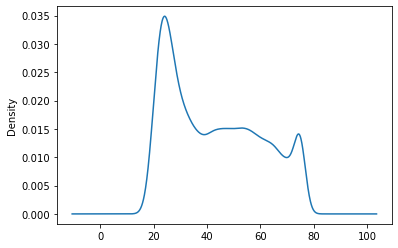

In [124]:
df[df.Reco_Insurance_Type=='Individual'].Upper_Age.plot.kde()

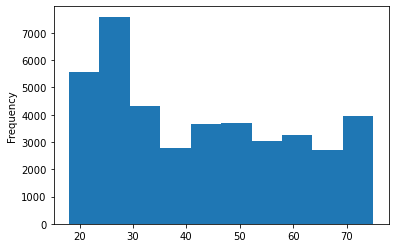

In [125]:
df[df.Reco_Insurance_Type=='Individual'].Upper_Age.plot.hist()

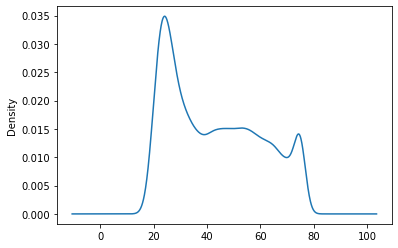

In [130]:
df[df.Reco_Insurance_Type=='Individual'].Lower_Age.plot.kde()

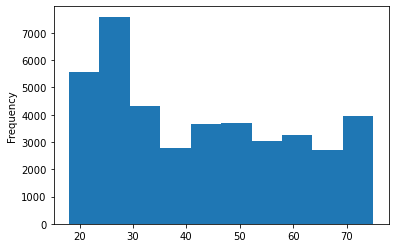

In [132]:
df[df.Reco_Insurance_Type=='Individual'].Lower_Age.plot.hist()

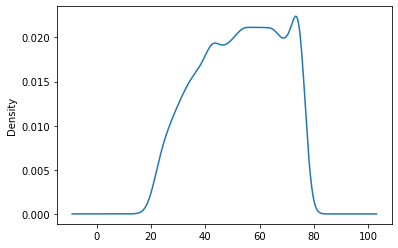

In [126]:
df[df.Reco_Insurance_Type=='Joint'].Upper_Age.plot.kde()

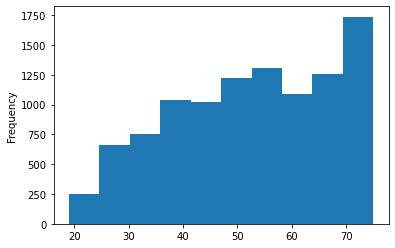

In [127]:
df[df.Reco_Insurance_Type=='Joint'].Upper_Age.plot.hist()

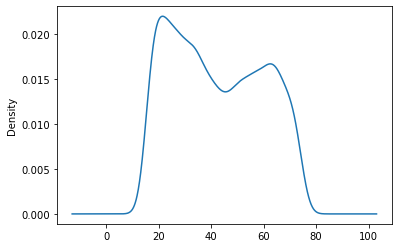

In [128]:
df[df.Reco_Insurance_Type=='Joint'].Lower_Age.plot.kde()

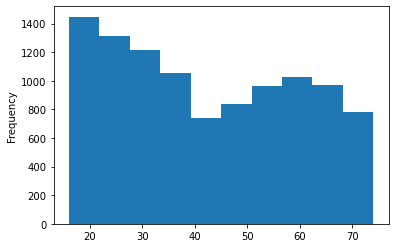

In [129]:
df[df.Reco_Insurance_Type=='Joint'].Lower_Age.plot.hist()

In [157]:
len(df['Health Indicator'].unique())-1

9

In [148]:
Counter(df['Health Indicator'])

Counter({'X1': 13010,
         'X2': 10332,
         nan: 11691,
         'X4': 5743,
         'X3': 6762,
         'X6': 1280,
         'X5': 1727,
         'X8': 78,
         'X7': 196,
         'X9': 63})

In [159]:
df.pivot_table(index=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

,Lower_Age
Health Indicator,
X1,42.186241
X2,43.430701
X3,41.241201
X4,43.373324
X5,45.607991
X6,41.528125
X7,48.688776
X8,44.153846
X9,43.000000


In [160]:
df.pivot_table(index=['Health Indicator'], values=['Upper_Age'], aggfunc=np.mean)

,Upper_Age
Health Indicator,
X1,44.227133
X2,45.487805
X3,43.473824
X4,45.460561
X5,47.964679
X6,44.161719
X7,51.056122
X8,47.423077
X9,45.349206


In [162]:
df.pivot_table(index=['Accomodation_Type'], columns=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

Lower_Age                                              \
Health Indicator          X1         X2         X3         X4         X5   
Accomodation_Type                                                          
Owned              48.624830  48.752003  48.195191  47.738207  49.328033   
Rented             35.480935  36.083871  34.986517  35.902738  37.251880   

                                                               
Health Indicator          X6         X7         X8         X9  
Accomodation_Type                                              
Owned              48.916239  51.758621  52.104167  47.888889  
Rented             35.309353  39.960784  31.433333  36.481481

In [162]:
df.pivot_table(index=['Accomodation_Type'], columns=['Health Indicator'], values=['Lower_Age'], aggfunc=np.mean)

Lower_Age                                              \
Health Indicator          X1         X2         X3         X4         X5   
Accomodation_Type                                                          
Owned              48.624830  48.752003  48.195191  47.738207  49.328033   
Rented             35.480935  36.083871  34.986517  35.902738  37.251880   

                                                               
Health Indicator          X6         X7         X8         X9  
Accomodation_Type                                              
Owned              48.916239  51.758621  52.104167  47.888889  
Rented             35.309353  39.960784  31.433333  36.481481

In [165]:
temp = df[['Health Indicator', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(index=['Accomodation_Type', 'Health Indicator'], values=['count'], aggfunc='count')

count
Accomodation_Type Health Indicator       
Owned             X1                 6637
                  X2                 5992
                  X3                 3202
                  X4                 3625
                  X5                 1195
                  X6                  585
                  X7                  145
                  X8                   48
                  X9                   36
Rented            X1                 6373
                  X2                 4340
                  X3                 3560
                  X4                 2118
                  X5                  532
                  X6                  695
                  X7                   51
                  X8                   30
                  X9                   27

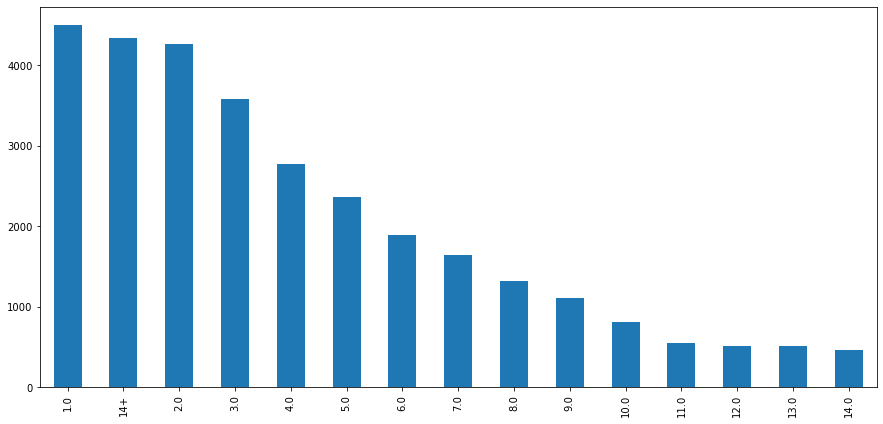

In [176]:
plt.figure(figsize=(15, 7))

df.Holding_Policy_Duration.value_counts().plot.bar()

In [181]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
14+                      3377    958
2.0                      2172   2088
1.0                      2161   2338
3.0                      1964   1622
4.0                      1616   1155
5.0                      1452    910
6.0                      1246    648
7.0                      1087    558
8.0                       898    418
9.0                       766    348
10.0                      568    245
11.0                      420    126
13.0                      378    133
12.0                      377    136
14.0                      362    104

In [182]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
1.0                      2161   2338
2.0                      2172   2088
3.0                      1964   1622
4.0                      1616   1155
14+                      3377    958
5.0                      1452    910
6.0                      1246    648
7.0                      1087    558
8.0                       898    418
9.0                       766    348
10.0                      568    245
12.0                      377    136
13.0                      378    133
11.0                      420    126
14.0                      362    104

In [184]:
temp = df[['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
1.0                      2161   2338
2.0                      2172   2088
3.0                      1964   1622
4.0                      1616   1155
14+                      3377    958
5.0                      1452    910
6.0                      1246    648
7.0                      1087    558
8.0                       898    418
9.0                       766    348
10.0                      568    245
12.0                      377    136
13.0                      378    133
11.0                      420    126
14.0                      362    104

In [191]:
temp = df.loc[df.Is_Spouse=='Yes'][['Holding_Policy_Duration', 'Accomodation_Type']]
temp['count'] = np.ones(len(temp))

temp.pivot_table(columns=['Accomodation_Type'], index=['Holding_Policy_Duration'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type       Owned Rented
Holding_Policy_Duration             
14+                       880    129
1.0                       480    236
2.0                       472    211
3.0                       456    165
4.0                       385    126
5.0                       336     94
6.0                       284     68
7.0                       253     65
8.0                       235     69
9.0                       192     40
10.0                      140     41
11.0                      113     22
13.0                      101     16
12.0                       96     15
14.0                       90     11

In [198]:
df.Holding_Policy_Type.value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [205]:
x = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

for i in x:
    print(f"---------------{i.upper()}----------------")
    print(df[df.Holding_Policy_Type==3][i].value_counts().sort_values(ascending=False), end='\n\n\n')

---------------CITY_CODE----------------
C2     2809
C1     2415
C3     1301
C4     1024
C9      534
C8      484
C6      461
C7      427
C10     370
C5      301
C20     281
C15     258
C11     258
C16     229
C13     228
C14     193
C12     158
C23     154
C22     153
C21     149
C26     142
C17     138
C29     107
C24      99
C25      99
C18      89
C27      89
C19      87
C28      65
C33      52
C32      48
C34      25
C30      21
C36      13
C35      12
C31       6
Name: City_Code, dtype: int64


---------------ACCOMODATION_TYPE----------------
Owned     8868
Rented    4411
Name: Accomodation_Type, dtype: int64


---------------RECO_INSURANCE_TYPE----------------
Individual    9991
Joint         3288
Name: Reco_Insurance_Type, dtype: int64


---------------IS_SPOUSE----------------
No     10564
Yes     2715
Name: Is_Spouse, dtype: int64


---------------HEALTH INDICATOR----------------
X1    3269
X2    2887
X4    1624
X3    1596
X5     503
X6     271
X7      49
X8      24
X9      14

In [206]:
x = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

for i in x:
    print(f"---------------{i.upper()}----------------")
    print(df[df.Holding_Policy_Type==1][i].value_counts().sort_values(ascending=False), end='\n\n\n')

---------------CITY_CODE----------------
C1     1592
C3      886
C2      612
C4      575
C10     368
C19     336
C17     333
C7      332
C15     322
C9      317
C6      275
C5      261
C8      233
C18     218
C12     195
C16     168
C24     151
C11     148
C21     130
C13     125
C14      97
C26      84
C22      66
C23      55
C28      54
C20      51
C33      45
C25      43
C29      36
C27      24
C34      17
C32      11
C30       6
C35       4
C36       2
C31       1
Name: City_Code, dtype: int64


---------------ACCOMODATION_TYPE----------------
Owned     4156
Rented    4017
Name: Accomodation_Type, dtype: int64


---------------RECO_INSURANCE_TYPE----------------
Individual    6640
Joint         1533
Name: Reco_Insurance_Type, dtype: int64


---------------IS_SPOUSE----------------
No     6986
Yes    1187
Name: Is_Spouse, dtype: int64


---------------HEALTH INDICATOR----------------
X1    2203
X2    1581
X3    1252
X4     771
X6     235
X5     209
X7      30
X8      15
X9      11
N

In [209]:
temp = df[['Reco_Policy_Cat', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Owned'), ascending=False)

count       
Accomodation_Type Owned Rented
Reco_Policy_Cat               
22                 3739   2863
18                 3226   2327
21                 2934   2093
17                 2186   1570
16                 2140   1944
19                 2010   1698
20                 1686   1491
1                  1073    894
12                  988   1180
14                  985    757
2                   862   1055
15                  801    814
13                  774    910
5                   670    337
3                   631    428
4                   530    485
7                   516    318
8                   466    310
11                  461    320
6                   460    391
9                   411    378
10                  402    368

In [210]:
temp = df[['Reco_Policy_Cat', 'Accomodation_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Accomodation_Type'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')\
    .sort_values(by=('count',  'Rented'), ascending=False)

count       
Accomodation_Type Owned Rented
Reco_Policy_Cat               
22                 3739   2863
18                 3226   2327
21                 2934   2093
16                 2140   1944
19                 2010   1698
17                 2186   1570
20                 1686   1491
12                  988   1180
2                   862   1055
13                  774    910
1                  1073    894
15                  801    814
14                  985    757
4                   530    485
3                   631    428
6                   460    391
9                   411    378
10                  402    368
5                   670    337
11                  461    320
7                   516    318
8                   466    310

In [215]:
temp = df[['Health Indicator', 'Reco_Policy_Cat']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Health Indicator'], index=['Reco_Policy_Cat'], values=['count'], aggfunc='count')

count                                                     
Health Indicator      X1      X2     X3     X4     X5     X6    X7    X8   X9
Reco_Policy_Cat                                                              
1                  500.0   404.0  269.0  215.0   67.0   60.0   4.0   8.0  6.0
2                  479.0   322.0  322.0  182.0   58.0   83.0   3.0   9.0  5.0
3                  251.0   239.0  108.0  157.0   34.0   16.0   4.0   NaN  NaN
4                  243.0   220.0  133.0  116.0   29.0   17.0   4.0   1.0  1.0
5                  252.0   207.0  117.0  115.0   32.0    9.0   9.0   1.0  NaN
6                  225.0   191.0  104.0   96.0   29.0   20.0   1.0   2.0  3.0
7                  200.0   179.0   89.0  105.0   48.0   11.0   4.0   2.0  1.0
8                  205.0   176.0   82.0   90.0   32.0   22.0   1.0   NaN  NaN
9                  219.0   157.0  107.0   77.0   26.0   18.0   1.0   2.0  2.0
10                 187.0   155.0  115.0   86.0   24.0   19.0   3.0   NaN  1.0
11                 190.0   183.0  104.0   95.0   21.0   15.0   NaN   NaN  NaN
12                 544.0   380.0  373.0  181.0   57.0  102.0   7.0  12.0  8.0
13                 419.0   327.0  262.0  139.0   39.0   83.0   2.0   2.0  3.0
14                 468.0   313.0  257.0  151.0   44.0   84.0   8.0   5.0  2.0
15                 441.0   271.0  253.0  143.0   33.0   84.0   2.0   7.0  3.0
16                1070.0   821.0  573.0  440.0  106.0   98.0  18.0   5.0  5.0
17                 919.0   764.0  466.0  498.0  179.0   59.0  23.0   3.0  1.0
18                1418.0  1171.0  703.0  654.0  178.0  117.0  13.0   4.0  4.0
19                1019.0   735.0  518.0  387.0  114.0   87.0   6.0   4.0  4.0
20                 874.0   637.0  416.0  334.0   92.0   78.0  13.0   2.0  5.0
21                1282.0  1094.0  655.0  566.0  151.0   88.0  18.0   6.0  6.0
22                1605.0  1386.0  736.0  916.0  334.0  110.0  52.0   3.0  3.0

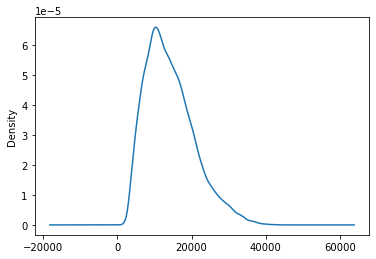

In [217]:
df.Reco_Policy_Premium.plot.kde()

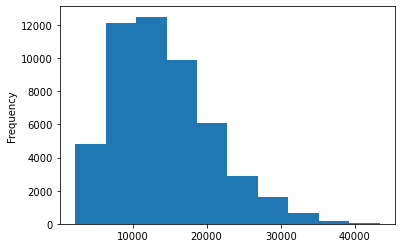

In [218]:
df.Reco_Policy_Premium.plot.hist()

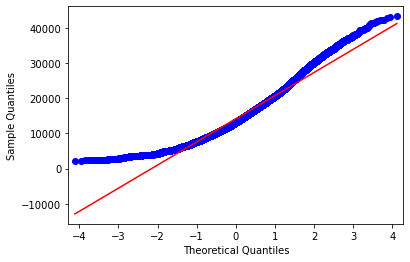

In [248]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = df.Reco_Policy_Premium
sm.qqplot(my_data, line='s')
pylab.show()

In [220]:
df.Reco_Policy_Premium.skew()

0.7824628894616024

In [233]:
temp = df[['Reco_Policy_Cat', 'Reco_Insurance_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Reco_Insurance_Type'],
                 index=['Reco_Policy_Cat'],
                 values=['count'],
                 aggfunc='count').sort_values(by=('count', 'Individual'), ascending=False)

count      
Reco_Insurance_Type Individual Joint
Reco_Policy_Cat                     
22                        5147  1455
18                        4467  1086
21                        3945  1082
16                        3253   831
19                        2921   787
17                        2921   835
20                        2539   638
12                        1809   359
2                         1601   316
1                         1534   433
14                        1393   349
13                        1361   323
15                        1277   338
3                          867   192
4                          864   151
5                          772   235
6                          679   172
11                         663   118
7                          642   192
10                         640   130
9                          636   153
8                          605   171

In [234]:
temp = df[['Reco_Policy_Cat', 'Reco_Insurance_Type']]
temp['count'] = np.ones(len(df))

temp.pivot_table(columns=['Reco_Insurance_Type'],
                 index=['Reco_Policy_Cat'],
                 values=['count'],
                 aggfunc='count').sort_values(by=('count', 'Joint'), ascending=False)

count      
Reco_Insurance_Type Individual Joint
Reco_Policy_Cat                     
22                        5147  1455
18                        4467  1086
21                        3945  1082
17                        2921   835
16                        3253   831
19                        2921   787
20                        2539   638
1                         1534   433
12                        1809   359
14                        1393   349
15                        1277   338
13                        1361   323
2                         1601   316
5                          772   235
7                          642   192
3                          867   192
6                          679   172
8                          605   171
9                          636   153
4                          864   151
10                         640   130
11                         663   118

In [235]:
df[df.Reco_Policy_Cat==22].Reco_Policy_Premium.describe()

count     6602.000000
mean     14492.876825
std       6818.907352
min       2464.000000
25%       9330.500000
50%      13442.000000
75%      18592.000000
max      42316.800000
Name: Reco_Policy_Premium, dtype: float64

In [236]:
df[df.Reco_Policy_Cat==18].Reco_Policy_Premium.describe()

count     5553.000000
mean     14663.434396
std       6694.163312
min       2616.000000
25%       9506.000000
50%      13798.400000
75%      18788.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

In [237]:
df[df.Reco_Policy_Cat==21].Reco_Policy_Premium.describe()

count     5027.000000
mean     14789.226855
std       6783.584351
min       2704.000000
25%       9712.000000
50%      13798.400000
75%      18799.000000
max      42739.200000
Name: Reco_Policy_Premium, dtype: float64

In [238]:
df[df.Reco_Policy_Cat==1].Reco_Policy_Premium.describe()

count     1967.000000
mean     13022.615455
std       5832.638200
min       2280.000000
25%       8648.000000
50%      12276.000000
75%      16667.600000
max      36812.800000
Name: Reco_Policy_Premium, dtype: float64

In [5]:
df.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [70]:
df.pivot_table(index=['Accomodation_Type'], values=['Reco_Policy_Premium'], aggfunc=np.mean)

,Reco_Policy_Premium
Accomodation_Type,
Owned,16283.779388
Rented,11785.182887


In [71]:
df.pivot_table(index=['Reco_Insurance_Type'], values=['Reco_Policy_Premium'], aggfunc=np.mean)

,Reco_Policy_Premium
Reco_Insurance_Type,
Individual,12220.413693
Joint,21994.752044


In [72]:
df.pivot_table(index=['Accomodation_Type'], columns=['Reco_Insurance_Type'],values=['Reco_Policy_Premium'], aggfunc=np.mean)

Reco_Policy_Premium              
Reco_Insurance_Type          Individual         Joint
Accomodation_Type                                    
Owned                      13784.090463  22790.694726
Rented                     10613.319731  19835.815029

In [73]:
df.pivot_table(index=['Reco_Policy_Cat'],
               values=['Reco_Policy_Premium'],
               aggfunc=np.mean).sort_values('Reco_Policy_Premium')

,Reco_Policy_Premium
Reco_Policy_Cat,
4,11757.498667
12,12364.669400
13,12580.054891
2,12751.993701
15,12820.275798
14,13338.291294
16,13394.831544
6,13571.756463
10,13933.463235


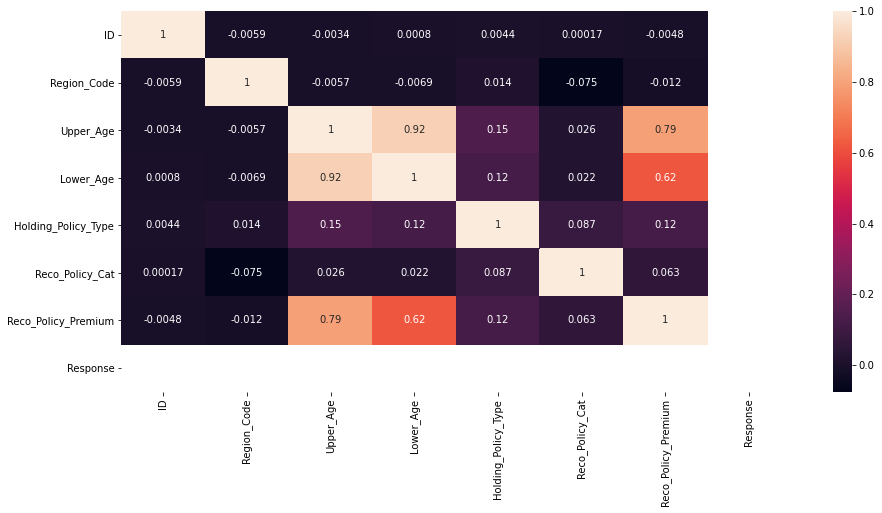

In [3]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True)